# Comparing machine learning models in scikit-learn
*From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*

In [1]:
#environment setup with watermark
%load_ext watermark
%watermark -a 'Gopala KR' -u -d -v -p watermark,numpy,pandas,matplotlib,nltk,sklearn,tensorflow,theano,mxnet,chainer

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Gopala KR 
last updated: 2018-01-30 

CPython 3.6.3
IPython 6.2.1

watermark 1.6.0
numpy 1.13.1
pandas 0.20.3
matplotlib 2.0.2
nltk 3.2.5
sklearn 0.19.0
tensorflow 1.3.0
theano 1.0.1
mxnet 1.0.0
chainer 3.3.0


## Agenda

- How do I choose **which model to use** for my supervised learning task?
- How do I choose the **best tuning parameters** for that model?
- How do I estimate the **likely performance of my model** on out-of-sample data?

## Review

- Classification task: Predicting the species of an unknown iris
- Used three classification models: KNN (K=1), KNN (K=5), logistic regression
- Need a way to choose between the models

**Solution:** Model evaluation procedures

## Evaluation procedure #1: Train and test on the entire dataset

1. Train the model on the **entire dataset**.
2. Test the model on the **same dataset**, and evaluate how well we did by comparing the **predicted** response values with the **true** response values.

In [2]:
# read in the iris data
from sklearn.datasets import load_iris
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

### Logistic regression

In [3]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X, y)

# predict the response values for the observations in X
logreg.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
# store the predicted response values
y_pred = logreg.predict(X)

# check how many predictions were generated
len(y_pred)

150

Classification accuracy:

- **Proportion** of correct predictions
- Common **evaluation metric** for classification problems

In [5]:
# compute classification accuracy for the logistic regression model
from sklearn import metrics
print(metrics.accuracy_score(y, y_pred))

0.96


- Known as **training accuracy** when you train and test the model on the same data

### KNN (K=5)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.966666666667


### KNN (K=1)

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

1.0


### Problems with training and testing on the same data

- Goal is to estimate likely performance of a model on **out-of-sample data**
- But, maximizing training accuracy rewards **overly complex models** that won't necessarily generalize
- Unnecessarily complex models **overfit** the training data

![Overfitting](images/05_overfitting.png)

*Image Credit: [Overfitting](http://commons.wikimedia.org/wiki/File:Overfitting.svg#/media/File:Overfitting.svg) by Chabacano. Licensed under GFDL via Wikimedia Commons.*

## Evaluation procedure #2: Train/test split

1. Split the dataset into two pieces: a **training set** and a **testing set**.
2. Train the model on the **training set**.
3. Test the model on the **testing set**, and evaluate how well we did.

In [8]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [9]:
# STEP 1: split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

/srv/venv/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


![Train/test split](images/05_train_test_split.png)

What did this accomplish?

- Model can be trained and tested on **different data**
- Response values are known for the testing set, and thus **predictions can be evaluated**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance

In [10]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)

(90, 4)
(60, 4)


In [11]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(90,)
(60,)


In [12]:
# STEP 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [13]:
# STEP 3: make predictions on the testing set
y_pred = logreg.predict(X_test)

# compare actual response values (y_test) with predicted response values (y_pred)
print(metrics.accuracy_score(y_test, y_pred))

0.95


Repeat for KNN with K=5:

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.966666666667


Repeat for KNN with K=1:

In [15]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


Can we locate an even better value for K?

In [16]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

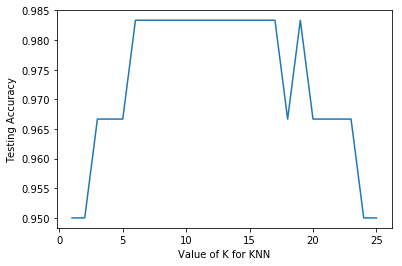

In [17]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

- **Training accuracy** rises as model complexity increases
- **Testing accuracy** penalizes models that are too complex or not complex enough
- For KNN models, complexity is determined by the **value of K** (lower value = more complex)

## Making predictions on out-of-sample data

In [18]:
# instantiate the model with the best known parameters
knn = KNeighborsClassifier(n_neighbors=11)

# train the model with X and y (not X_train and y_train)
knn.fit(X, y)

# make a prediction for an out-of-sample observation
knn.predict([[3, 5, 4, 2]])

array([1])

## Downsides of train/test split?

- Provides a **high-variance estimate** of out-of-sample accuracy
- **K-fold cross-validation** overcomes this limitation
- But, train/test split is still useful because of its **flexibility and speed**

## Resources

- Quora: [What is an intuitive explanation of overfitting?](http://www.quora.com/What-is-an-intuitive-explanation-of-overfitting/answer/Jessica-Su)
- Video: [Estimating prediction error](https://www.youtube.com/watch?v=_2ij6eaaSl0&t=2m34s) (12 minutes, starting at 2:34) by Hastie and Tibshirani
- [Understanding the Bias-Variance Tradeoff](http://scott.fortmann-roe.com/docs/BiasVariance.html)
    - [Guiding questions](https://github.com/justmarkham/DAT8/blob/master/homework/09_bias_variance.md) when reading this article
- Video: [Visualizing bias and variance](http://work.caltech.edu/library/081.html) (15 minutes) by Abu-Mostafa

## Comments or Questions?

- Email: <kevin@dataschool.io>
- Website: http://dataschool.io
- Twitter: [@justmarkham](https://twitter.com/justmarkham)

In [19]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

In [ ]:
test complete; Gopal